Build the Dataset from the prepared images folders

In [2]:
from classificationmodel.dataset import dataset_generator
import configparser
# Specify the absolute file path of the configuration file
config_file_path = 'classificationmodel/config.ini'

# Load the configuration file
config = configparser.ConfigParser()
config.read(config_file_path)
img_size = config.getint('setting', 'img_size')
train_params = {'label_mode': config.get('setting', 'label_mode'),
                'color_mode': config.get('setting', 'color_mode'),
                'batch_size': config.getint('setting', 'batch'),
                'image_size': eval(config.get('setting', 'image_size')),
                'seed': config.getint('setting', 'seed')}
img_path = config.get('path', 'img_path')
test_img_path = config.get('path', 'test_img_path')


train_set, val_set, test_set = dataset_generator(img_path,
                                                 test_img_path,
                                                 train_params)

Found 1000 files belonging to 4 classes.
Using 900 files for training.


2023-07-09 08:16:59.625849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-09 08:16:59.627314: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-09 08:16:59.627415: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-EDANTKA): /proc/driver/nvidia/version does not exist
2023-07-09 08:16:59.628471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1000 files belonging to 4 classes.
Using 100 files for validation.
Found 100 files belonging to 4 classes.


Visualize some images

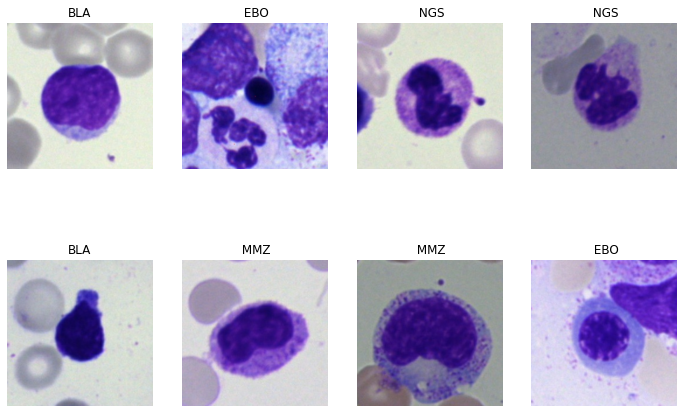

In [3]:
from classificationmodel.dataset import image_visualization
classes = config.get('setting', 'classes').split(',')

image_visualization(train_set, classes)

Initialize the EfficientNet model

Epoch 1/10
113/113 [==============================] - ETA: 0s - loss: 3.8390 - accuracy: 0.2711
Epoch 1: val_accuracy improved from -inf to 0.22000, saving model to best_efficientnet.h5
113/113 [==============================] - 970s 8s/step - loss: 3.8390 - accuracy: 0.2711 - val_loss: 1.5497 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 2/10
113/113 [==============================] - ETA: 0s - loss: 1.9178 - accuracy: 0.2522
Epoch 2: val_accuracy improved from 0.22000 to 0.30000, saving model to best_efficientnet.h5
113/113 [==============================] - 812s 7s/step - loss: 1.9178 - accuracy: 0.2522 - val_loss: 1.4363 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: 1.6852 - accuracy: 0.3378
Epoch 3: val_accuracy did not improve from 0.30000
113/113 [==============================] - 804s 7s/step - loss: 1.6852 - accuracy: 0.3378 - val_loss: 1.4158 - val_accuracy: 0.2300 - lr: 0.0010
Epoch 4/10
113/113 [=======================

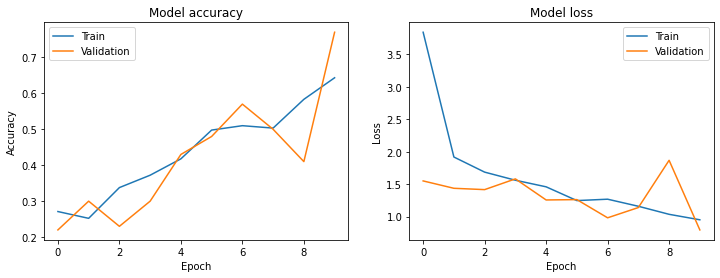

In [15]:
from classificationmodel.model import (build_model, 
                                       train_model, 
                                       save_model, 
                                       plot_history)
num_classes = config.getint('setting', 'num_classes')
batch = config.getint('setting', 'batch')
epochs = config.getint('setting', 'epochs')
weight_path = config.get('path', 'weight_path')

efficientNet = build_model(num_classes)
model_history, trained_model = train_model(efficientNet,
                                            train_set, 
                                            val_set, 
                                            batch, 
                                            epochs,
                                            weight_path)
saved_model = save_model(efficientNet, 'model.json')
plot_history(model_history)

Evaluate the trained model

In [16]:
from classificationmodel.evaluation import evaluate_model, evaluation_report
evaluate_model(trained_model, test_set)
evaluation_report(test_set, efficientNet, classes)

13/13 [==============================] - 18s 1s/step - loss: 0.8063 - accuracy: 0.7200
Test Loss: 0.8062760829925537
Test Accuracy: 0.7200000286102295
1/1 [==============================] - 1s 788ms/step
              precision    recall  f1-score   support

         BLA       0.64      0.72      0.68        25
         EBO       0.67      0.88      0.76        25
         MMZ       0.65      0.52      0.58        25
         NGS       1.00      0.76      0.86        25

    accuracy                           0.72       100
   macro avg       0.74      0.72      0.72       100
weighted avg       0.74      0.72      0.72       100

